In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend import plotting
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

Project objective: to detect situations in which fire poses a threat to people

Stakeholder: Fire brigade working on an early warning and response system for fire hazards

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Read train dataset 
df = pd.read_csv('CSV/Fire-Incidents.csv')

In [4]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [6]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [ ]:
## Data Cleaning

In [7]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Last_TFS_Unit_Clear_Time']

In [8]:
df.drop(columns=column_to_drop, inplace= True)

In [9]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


<Axes: >

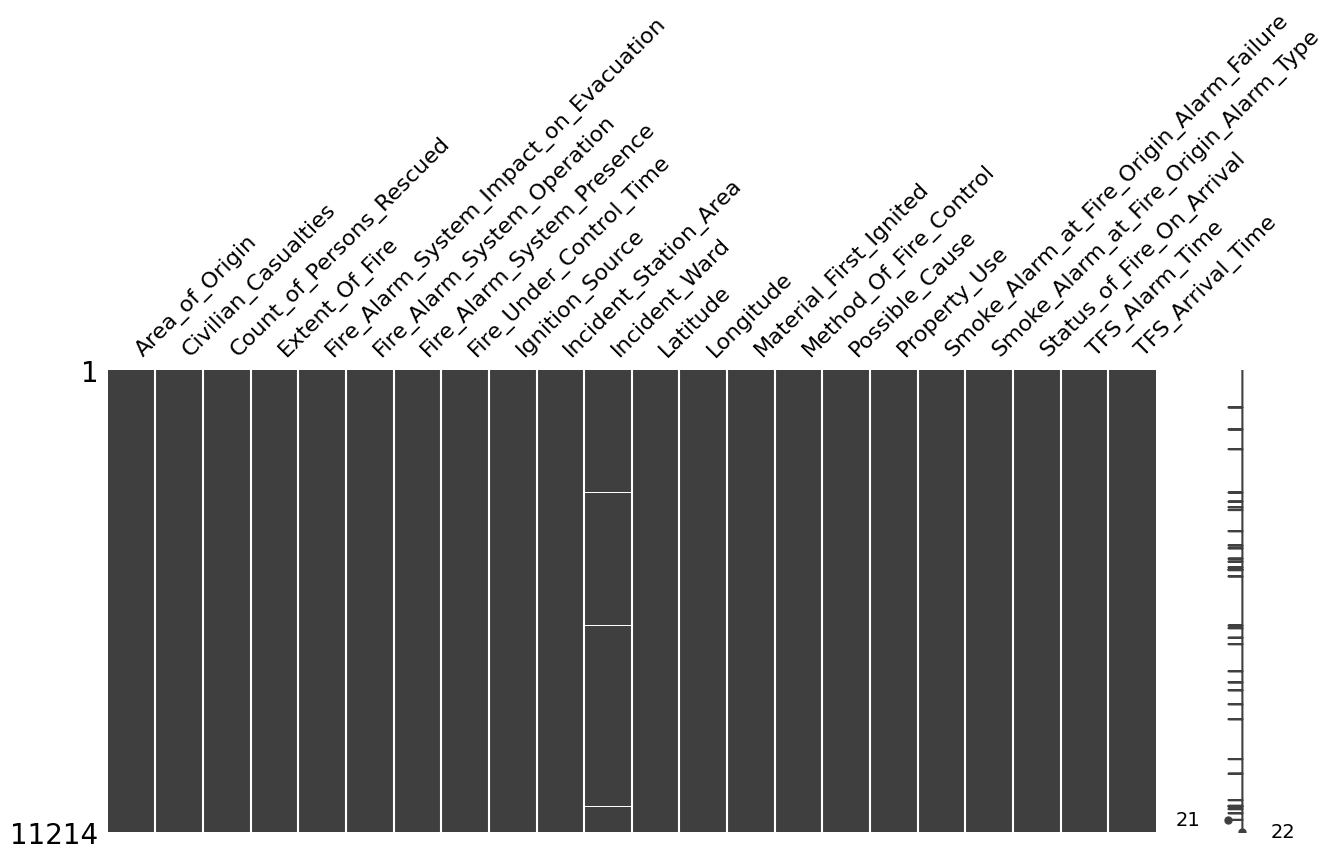

In [10]:
ms.matrix(df, figsize=(15, 6))

In [11]:
df.isna().sum()

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fire_On_Arrival                    0
TFS_Alarm_Time                               0
TFS_Arrival_T

In [12]:
df.dropna(inplace= True)

In [13]:
df.isna().sum() 

Area_of_Origin                              0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                                0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure    0
Smoke_Alarm_at_Fire_Origin_Alarm_Type       0
Status_of_Fire_On_Arrival                   0
TFS_Alarm_Time                              0
TFS_Arrival_Time                  

In [14]:
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !') 

No missing values in dataset !


In [ ]:
## Data Type Change

In [15]:
# Change to datetime
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time']) 

In [16]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08T04:13:54


In [17]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  object        
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area            

In [19]:
# Change to datetime
df['Fire_Under_Control_Time'] = pd.to_datetime(df['Fire_Under_Control_Time'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  datetime64[ns]
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area            

In [21]:
## Feature Enginering

In [22]:
((df['Civilian_Casualties'] > 0) & (df['Civilian_Casualties'] < 1)).sum()

0

In [23]:
(df['Civilian_Casualties'] > 1).sum() 

181

In [24]:
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1 

In [25]:
(df['Civilian_Casualties'] > 1).sum()

0

In [26]:
df['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

In [27]:
df['Property_Use'].value_counts()

Property_Use
Multi-Unit Dwelling - Over 12 Units                               3716
Detached Dwelling                                                 2309
Semi-Detached Dwelling                                             727
Attached Dwelling (eg. rowhouse, townhouse, etc.)                  577
Multi-Unit Dwelling - 2 to 6 Units                                 279
                                                                  ... 
Hotel, Motel, Lodging - Less than 4 guests or suites (inc B&B)       1
Market - Outdoors (flowers, fruit, vegetable sales)                  1
Automobile                                                           1
Sto: Tank, Tank Farm, Other Liquids                                  1
Heating Plant - central/district heating plant, steam, etc           1
Name: count, Length: 217, dtype: int64

In [28]:
df['Property_Use']

0        Multi-Unit Dwelling - Over 12 Units
1                                  Infirmary
2        Multi-Unit Dwelling - Over 12 Units
3           Clothing Store, Accessories, fur
4        Multi-Unit Dwelling - Over 12 Units
                        ...                 
11209    Multi-Unit Dwelling - Over 12 Units
11210                General Business Office
11211                General Business Office
11212    Multi-Unit Dwelling - Over 12 Units
11213                         Hardware Store
Name: Property_Use, Length: 11181, dtype: object

In [29]:
df['Response_Times'] = ((df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)).round(2)

In [30]:
df['Response_Times']

0        4.55
1        5.18
2        3.70
3        2.95
4        5.07
         ... 
11209    3.50
11210    6.23
11211    4.57
11212    4.58
11213    4.85
Name: Response_Times, Length: 11181, dtype: float64

In [31]:
df['Fire_duration'] = ((df['Fire_Under_Control_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)).round(2)

In [32]:
df['Fire_duration'] 

0        16.87
1         9.80
2        51.23
3        46.78
4        29.63
         ...  
11209    15.22
11210    33.42
11211     9.45
11212    13.98
11213    52.90
Name: Fire_duration, Length: 11181, dtype: float64

In [192]:
### Encoding

In [33]:
lab_encoder = LabelEncoder()

In [34]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df[col] = lab_encoder.fit_transform(df[col])
    return df

In [35]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63


In [36]:
df[df['Area_of_Origin'] == 'Porch or Balcony']['Area_of_Origin'].count() 

950

In [37]:
df[df['Area_of_Origin'] == 'Cooking Area or Kitchen']['Area_of_Origin'].count() 

2865

In [38]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63


In [39]:
df['Fire_Alarm_System_Operation'].value_counts()

Fire_Alarm_System_Operation
Fire alarm system operated                  4513
Not applicable (no system)                  3858
Fire alarm system operation undetermined    1417
Fire alarm system did not operate           1393
Name: count, dtype: int64

In [40]:
df['Fire_Alarm_System_Presence'].value_counts()

Fire_Alarm_System_Presence
Fire alarm system present                                                 6208
Not applicable (bldg not classified by OBC OR detached/semi/town home)    1935
No Fire alarm system                                                      1788
Undetermined                                                              1250
Name: count, dtype: int64

In [41]:
df = pd.get_dummies(df, columns= ['Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence'])

In [42]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63,False,True,False,False,True,False,False,False


In [43]:
df['Fire_Alarm_System_Operation_Fire alarm system did not operate'].sum() 

1393

In [44]:
df["Fire_Alarm_System_Operation_Fire alarm system operated"].sum() 

4513

In [45]:
df["Fire_Alarm_System_Operation_Fire alarm system operation undetermined"].sum()

1417

In [46]:
df["Fire_Alarm_System_Operation_Not applicable (no system)"].sum() 

3858

In [47]:
df["Fire_Alarm_System_Presence_Fire alarm system present"].sum() 

6208

In [48]:
df["Fire_Alarm_System_Presence_No Fire alarm system"].sum() 

1788

In [49]:
df["Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)"].sum() 

1935

In [50]:
df["Fire_Alarm_System_Presence_Undetermined"].sum() 

1250

In [ ]:
#### Model

In [51]:
df_mode = df.copy()

In [52]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63,False,True,False,False,True,False,False,False


In [53]:
# Save new dataset to csv
df_mode.to_csv('CSV/df_mode.csv')

In [54]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63,False,True,False,False,True,False,False,False


In [55]:
new_col_to_drop = ['Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'TFS_Alarm_Time', 'TFS_Arrival_Time', 'Ignition_Source', 'Material_First_Ignited', 'Possible_Cause','Incident_Station_Area', 'Incident_Ward', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', "Fire_Under_Control_Time","Latitude", "Longitude" ]

In [56]:
df_mode.drop(columns= new_col_to_drop, inplace= True)

In [57]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Extinguished by fire department,Fire with smoke showing only - including vehic...,4.55,16.87,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Extinguished by occupant,Fire extinguished prior to arrival,5.18,9.80,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Extinguished by fire department,Flames showing from small area (one storey or ...,3.70,51.23,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Extinguished by fire department,Flames showing from large area (more than one ...,2.95,46.78,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Extinguished by fire department,Fire with no evidence from street,5.07,29.63,False,True,False,False,True,False,False,False


In [ ]:
# Status_of_Fire_On_Arrival: Może dostarczyć informacji o stanie pożaru przed interwencją.
# Fire_Alarm_System_Operation i Fire_Alarm_System_Presence: Ważne dla oceny gotowości budynku na pożar.
# Response_Times: Ważne dla oceny szybkości reakcji straży pożarnej.
# Fire_Alarm_System_Impact_on_Evacuation: Istotne dla oceny procesu ewakuacji.
# Extent_Of_Fire: Może wskazywać na potencjalne zagrożenie
# Count_of_Persons_Rescued: Ważne dla oceny skutków pożaru.
# Civilian_Casualties: Bezpośrednio odnosi się do zagrożenia dla ludzi.

In [59]:
lab_encoder = LabelEncoder()

In [60]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df_mode[col] = lab_encoder.fit_transform(df_mode[col])
    return df_mode

In [61]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Extinguished by fire department,Fire with smoke showing only - including vehic...,4.55,16.87,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Extinguished by occupant,Fire extinguished prior to arrival,5.18,9.80,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Extinguished by fire department,Flames showing from small area (one storey or ...,3.70,51.23,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Extinguished by fire department,Flames showing from large area (more than one ...,2.95,46.78,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Extinguished by fire department,Fire with no evidence from street,5.07,29.63,False,True,False,False,True,False,False,False


In [62]:
columns_to_lab_encode = ['Area_of_Origin', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival']

In [63]:
df_mode = encode_labels(columns_to_lab_encode)

In [64]:
df_mode.head(5)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,51,0,86,0,4,2,3,4.55,16.87,True,False,False,False,True,False,False,False
1,11,0,28,1,4,3,1,5.18,9.80,False,True,False,False,True,False,False,False
2,31,1,16,8,5,2,5,3.70,51.23,False,True,False,False,True,False,False,False
3,70,0,12,3,6,2,4,2.95,46.78,False,False,True,False,False,False,False,True
4,62,1,11,8,5,2,2,5.07,29.63,False,True,False,False,True,False,False,False


In [75]:
X = df_mode.drop('Civilian_Casualties', axis=1)
y = df_mode['Civilian_Casualties']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
y_pred = model.predict(X_test)
y_pred

array([0.00416837, 0.08560836, 0.10215805, ..., 0.38808775, 0.05696699,
       0.2106542 ], dtype=float32)

In [84]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07404231871292516


In [ ]:
## Time series

In [86]:
import plotly.express as px

In [87]:
df_mode.columns

Index(['Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival', 'Response_Times',
       'Fire_duration',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined'],
      dtype='object')

In [88]:
fig = px.scatter(df_mode, x='Response_Times', y='Count_of_Persons_Rescued')

fig.update_xaxes(range=[0, 30])
fig.show()

In [89]:
fig = px.scatter(df, x='Fire_duration', y='Extent_Of_Fire', title='Związek między czasem trwania pożaru a jego zakresem')
fig.show()

In [90]:
fig = px.scatter(df, x='Fire_duration', y='Civilian_Casualties', title='Związek między czasem trwania pożaru a jego zakresem')
fig.show()

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [92]:
seasonal_decomp = seasonal_decompose(df_mode['Fire_duration'], model='multiplicative', period=12) 

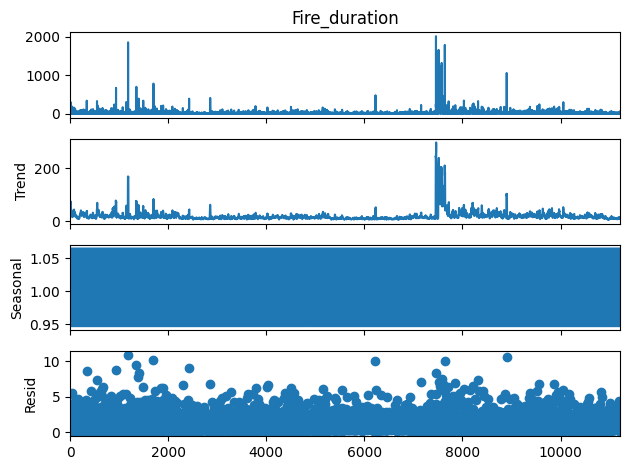

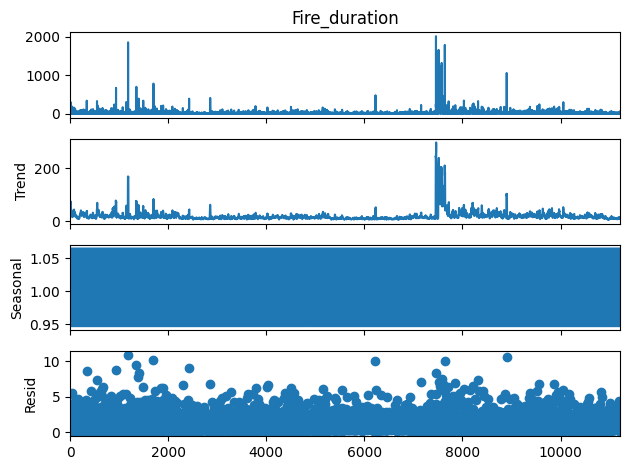

In [93]:
seasonal_decomp.plot()

In [94]:
fig = px.bar(df_mode, x='Area_of_Origin', y='Civilian_Casualties', title='Ofiary cywilne w zależności od obszaru pochodzenia')
fig.show()

# Cooking Area or Kitchen --> 11

In [95]:
fig = px.bar(df_mode, x='Area_of_Origin', y='Count_of_Persons_Rescued', title='Liczba uratowanych osób zależności od obszaru pochodzenia')
fig.show()

In [96]:
df_mode['Civilian_Casualties'].sum()

948

In [97]:
df_mode['Count_of_Persons_Rescued'].sum()

697

In [98]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,51,0,86,0,4,2,3,4.55,16.87,True,False,False,False,True,False,False,False
1,11,0,28,1,4,3,1,5.18,9.80,False,True,False,False,True,False,False,False
2,31,1,16,8,5,2,5,3.70,51.23,False,True,False,False,True,False,False,False
3,70,0,12,3,6,2,4,2.95,46.78,False,False,True,False,False,False,False,True
4,62,1,11,8,5,2,2,5.07,29.63,False,True,False,False,True,False,False,False


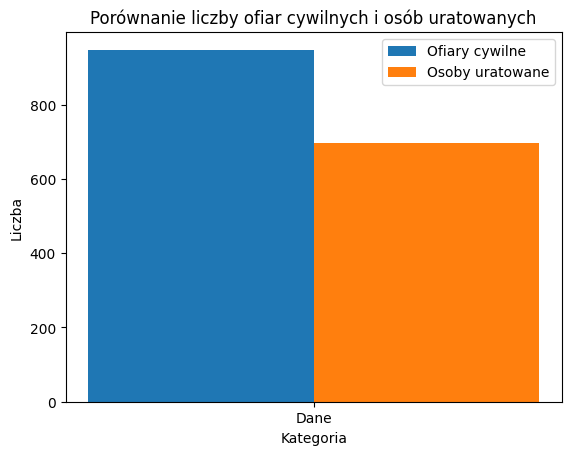

In [99]:
ofiary_cywilne = df_mode['Civilian_Casualties'].sum()
osoby_uratowane = df_mode['Count_of_Persons_Rescued'].sum()

bar_width = 0.35
index = np.arange(1)

fig, ax = plt.subplots()

bar1 = ax.bar(index, ofiary_cywilne, bar_width, label='Ofiary cywilne')
bar2 = ax.bar(index + bar_width, osoby_uratowane, bar_width, label='Osoby uratowane')

ax.set_xlabel('Kategoria')
ax.set_ylabel('Liczba')
ax.set_title('Porównanie liczby ofiar cywilnych i osób uratowanych')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Dane'])
ax.legend()

plt.show()


In [100]:
df_mode.columns

Index(['Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival', 'Response_Times',
       'Fire_duration',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined'],
      dtype='object')

In [101]:
correlation = df_mode['Fire_duration'].corr(df_mode['Extent_Of_Fire'])
print(f'Korelacja między czasem trwania pożaru a liczbą ofiar cywilnych: {correlation}')

Korelacja między czasem trwania pożaru a liczbą ofiar cywilnych: 0.1789210886289902


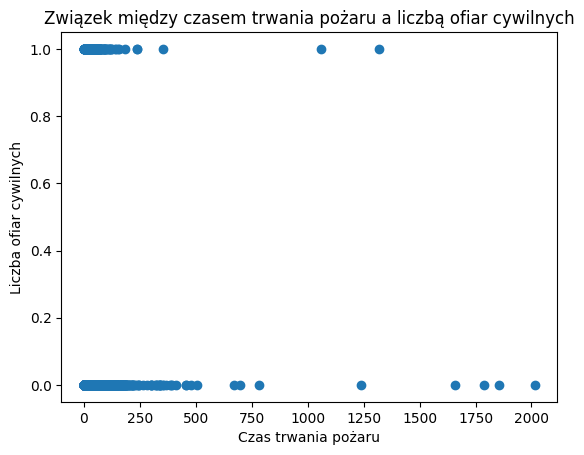

In [102]:
import matplotlib.pyplot as plt

plt.scatter(df_mode['Fire_duration'], df_mode['Civilian_Casualties'])
plt.xlabel('Czas trwania pożaru')
plt.ylabel('Liczba ofiar cywilnych')
plt.title('Związek między czasem trwania pożaru a liczbą ofiar cywilnych')
plt.show()

In [ ]:
## logistic regression

In [149]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,51,0,86,0,4,2,3,4.55,16.87,True,False,False,False,True,False,False,False
1,11,0,28,1,4,3,1,5.18,9.80,False,True,False,False,True,False,False,False
2,31,1,16,8,5,2,5,3.70,51.23,False,True,False,False,True,False,False,False
3,70,0,12,3,6,2,4,2.95,46.78,False,False,True,False,False,False,False,True
4,62,1,11,8,5,2,2,5.07,29.63,False,True,False,False,True,False,False,False


In [155]:
train_x, test_x, train_y, test_y = train_test_split(df_mode.drop('Extent_Of_Fire',axis=1),df_mode['Extent_Of_Fire'], test_size=0.2, random_state=42)

In [156]:
test_x.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Response_Times,Fire_duration,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
8802,57,0,0,6,2,3,4.45,15.67,True,False,False,False,True,False,False,False
11006,18,0,0,0,0,3,5.02,10.35,False,True,False,False,True,False,False,False
9948,30,0,0,0,0,2,8.38,14.92,False,True,False,False,True,False,False,False
5122,62,0,0,6,2,2,6.35,31.27,False,False,True,False,False,False,False,True
3017,11,1,0,5,3,1,4.82,14.13,False,False,True,False,True,False,False,False


In [169]:
model_1 = LogisticRegression().fit(train_x, train_y)
model_1

c:\Users\barto\anaconda3\envs\infoshare_virtual_e\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [161]:
model_1.coef_

array([[ 1.01728823e-02, -2.40910452e-01, -1.55635239e-01,
         1.24233462e-01,  6.77729665e-01, -2.53054975e-01,
         3.27916219e-01, -2.53399532e-02,  1.53420872e-01,
         1.71866493e-01,  5.79870282e-02, -1.25313935e-01,
         3.15352765e-01, -1.44126417e-01,  4.67441608e-05,
         8.66873661e-02],
       [ 3.49539982e-05,  9.76967975e-02, -5.48729835e-03,
         1.26799385e-01,  5.43113177e-01, -2.79634922e-01,
         3.57749347e-01, -9.80713440e-03,  3.16384961e-03,
         3.48188193e-01, -8.63747668e-02, -1.38283188e-02,
         3.58668263e-01,  6.00082106e-02, -3.59531774e-02,
        -1.31574340e-01],
       [ 2.87847066e-03, -4.10090650e-02, -3.02909117e-02,
         1.57369560e-01, -1.07446314e-01,  1.26588827e-01,
         3.34415126e-02, -1.08998943e-02,  1.12250574e-02,
        -1.29032533e-01,  6.43763027e-02,  2.55860736e-03,
        -1.01392169e-01, -1.08817163e-02,  7.13942867e-03,
         5.42618911e-02],
       [ 6.13033657e-04, -2.06467510e

In [162]:
model_1.feature_names_in_

array(['Area_of_Origin', 'Civilian_Casualties',
       'Count_of_Persons_Rescued',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Method_Of_Fire_Control',
       'Status_of_Fire_On_Arrival', 'Response_Times', 'Fire_duration',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined'], dtype=object)

In [163]:
pred_train = model_1.predict(train_x)
pred_train

array([1, 0, 0, ..., 1, 1, 0])

In [167]:
pred_train_proba = model_1.predict_proba(train_x)[:,1] 
pred_train_proba

array([0.40751579, 0.37046612, 0.30788654, ..., 0.41801472, 0.26207617,
       0.36703473])

In [166]:
dokladnosc = accuracy_score(train_y, pred_train)
print(f'Dokładność modelu: {dokladnosc}')

Dokładność modelu: 0.4930679785330948
